In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df_selection = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ACTIVIDADFISICA/balanced_activity_selection.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ACTIVIDADFISICA/activity_test.csv')

In [85]:
#Dividiendo los datos en x e y
x_train = df_selection.drop(['Diagnostico'], axis=1)
y_train = df_selection['Diagnostico']

In [86]:
#Dividiendo el dataset de prueba
x_test = df_test.drop(['Diagnostico'], axis=1)
y_test = df_test['Diagnostico']

**Algoritmos de Clasificación:**</br>
**Máquina de vectores de soporte**

In [87]:
#Entrenando con SVM
from sklearn.svm import SVC
SupportVectorMachine=SVC()
SupportVectorMachine.fit(x_train,y_train)

SVC()

In [88]:
x_test = x_test[['a_moderadas','a_intensas','f_muscular','f_tendones']]

In [89]:
#Calculando las predicciones con el modelo entrenado y
#con los valores de prueba de x
import time #Módulo
start_time = time.time()
predictions_svm = SupportVectorMachine.predict(x_test) 
total_time = time.time() - start_time
print(predictions_svm)

[1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


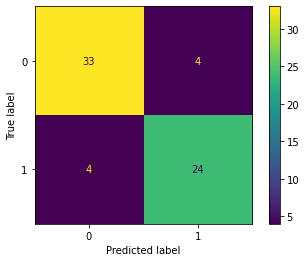

In [90]:
#Creando la matriz de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SupportVectorMachine, x_test, y_test)
plt.show()

In [91]:
#Imprimiendo las métricas de evaluación
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score 

#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_svm)) 
print("\nPrecision:  ",precision_score(y_test, predictions_svm))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.8769230769230769

Precision:   0.8571428571428571

Llevó 0.007178068161010742 segundos en total.


**K Vecinos mas cercanos**

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
start_time = time.time()
predictions_knn = knn.predict(x_test) 
total_time = time.time() - start_time
print(predictions_knn)

[1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


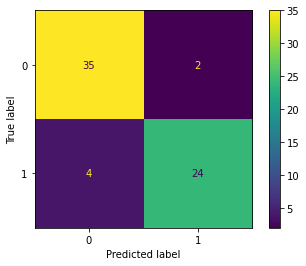

In [94]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [95]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_knn)) 
print("\nPrecision:  ",precision_score(y_test, predictions_knn))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.9076923076923077

Precision:   0.9230769230769231

Llevó 0.009148120880126953 segundos en total.


**Árboles de decisiones**

In [96]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [97]:
start_time = time.time()
predictions_tr = tr.predict(x_test)
total_time = time.time() - start_time 
print(predictions_tr)

[1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0]


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


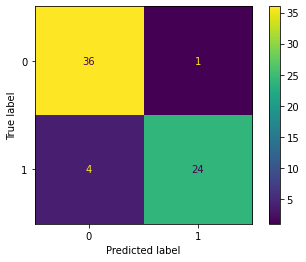

In [99]:
plot_confusion_matrix(tr, x_test, y_test)
plt.show()

In [100]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_tr)) 
print("\nPrecision:  ",precision_score(y_test, predictions_tr))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.9230769230769231

Precision:   0.96

Llevó 0.0062100887298583984 segundos en total.


Validacion Cruzada con SVM

In [101]:
from sklearn.model_selection import cross_val_score

SupportVectorMachine.fit(x_train, y_train)
print(SupportVectorMachine.score(x_test, y_test))
print(cross_val_score(SupportVectorMachine, x_test, y_test, cv=5).mean())

0.8769230769230769
0.8923076923076924


Validacion Cruzada con KNN

In [102]:
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
print(cross_val_score(knn, x_test,y_test, cv=5).mean())

0.9076923076923077
0.9230769230769231


Validacion Cruzada con Arbol

In [103]:
tr.fit(x_train,y_train)
print(tr.score(x_test, y_test))
print(cross_val_score(tr, x_test, y_test, cv=5).mean())

0.9230769230769231
0.8615384615384617


**MLP

In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
MLP = MLPClassifier(solver='lbfgs', max_iter=500, alpha=1e-5, hidden_layer_sizes=(100, 100, 100, 100, 100),
                    random_state=1)
#se genera el modelo de entrenamiento
MLP.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100, 100),
              max_iter=500, random_state=1, solver='lbfgs')

In [106]:
#se genera el modelo predictivo
prediccionesMLP = MLP.predict(x_test)

In [107]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, prediccionesMLP)) 
print("\nPrecision:  ",precision_score(y_test, prediccionesMLP))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.9076923076923077

Precision:   0.9583333333333334

Llevó 0.0062100887298583984 segundos en total.
